In [1]:
import pandas as pd
import numpy as np
import scipy.integrate as integrate
import warnings
warnings.filterwarnings("ignore")

In [2]:
def utilcalc(b1, b2, theta_upper, theta_lower, fc=1, fd=1, pi=0.5):

  b_bar = (b1+b2)/2
  # print("b_bar =", b_bar)

  delt = (theta_upper-theta_lower)/2
  # print("delt =", delt)

  # cut points for integrals

  # thea1:
  # Min{b_bar, b1+theta_upper}
  min_bb_b1thu = np.min([b_bar, (b1+theta_upper)])
  # Min{b_bar, b1+theta_lower}
  min_bb_b1thl = np.min([b_bar, (b1+theta_lower)])
  # Min{b_bar-delta, b1+theta_lower}
  min_bbmd_b1thl = np.min([(b_bar-delt), (b1+theta_lower)])
  # Min{b_bar+delta, b1+theta_upper}
  min_bbpd_b1thu = np.min([(b_bar+delt), (b1+theta_upper)])

  # Max{0, b1-theta_upper}
  max_0_b1thu = np.max([0, (b1-theta_upper)])
  # Max{0, b1-theta_lower}
  max_0_b1thl = np.max([0, (b1-theta_lower)])

  # thea2:
  # Max{b_bar, b2-theta_upper}
  max_bb_b2thu = np.max([b_bar, (b2-theta_upper)])
  # Max{b_bar, b2-theta_lower}
  max_bb_b2thl = np.max([b_bar, (b2-theta_lower)])
  # Max{b_bar+delta, b2-theta_lower}
  max_bbpd_b2thl = np.max([(b_bar+delt), (b2-theta_lower)])
  # Max{b_bar-delta, b2-theta_upper}
  max_bbmd_b2thu = np.max([(b_bar-delt), (b2-theta_upper)])

  # Min{1, b2+theta_upper}
  min_1_b2thu = np.min([1, (b2+theta_upper)])
  # Min{1, b2+theta_lower}
  min_1_b2thl = np.min([1, (b2+theta_lower)])

  u1cc = (pi*np.max([(integrate.quad(lambda x: fc, max_0_b1thu, min_bb_b1thu))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_0_b1thl, min_bb_b1thl))[0],0]))
  # print("U1CC =", u1cc)

  u2cc = (pi*np.max([(integrate.quad(lambda x: fc, max_bb_b2thu, min_1_b2thu))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_bb_b2thl, min_1_b2thl))[0],0]))
  # print("U2CC =", u2cc)

  u1dd = (pi*np.max([(integrate.quad(lambda x: fc, max_0_b1thl, min_bb_b1thl))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_0_b1thu, min_bb_b1thu))[0],0]))
  # print("U1DD =", u1dd)

  u2dd = (pi*np.max([(integrate.quad(lambda x: fc, max_bb_b2thl, min_1_b2thl))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_bb_b2thu, min_1_b2thu))[0],0]))
  # print("U2DD =", u2dd)

  u1cd = (pi*np.max([(integrate.quad(lambda x: fc, max_0_b1thu, min_bbpd_b1thu))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_0_b1thl, min_bbmd_b1thl))[0],0]))
  # print("U1CD =", u1cd)

  u2cd = (pi*np.max([(integrate.quad(lambda x: fc, max_bbpd_b2thl, min_1_b2thl))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_bbmd_b2thu, min_1_b2thu))[0],0]))
  # print("U2CD =", u2cd)

  u1dc = (pi*np.max([(integrate.quad(lambda x: fc, max_0_b1thl, min_bbmd_b1thl))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_0_b1thu, min_bbpd_b1thu))[0],0]))
  # print("U1DC =", u1dc)

  u2dc = (pi*np.max([(integrate.quad(lambda x: fc, max_bbmd_b2thu, min_1_b2thu))[0],0])) + ((1-pi)*np.max([(integrate.quad(lambda x: fd, max_bbpd_b2thl, min_1_b2thl))[0],0]))
  # print("U2DC =", u2dc)

  return {"u1cc":round(u1cc, 4), "u2cc":round(u2cc, 4), "u1dd":round(u1dd, 4), "u2dd":round(u2dd, 4), "u1cd":round(u1cd, 4), "u2cd":round(u2cd, 4), "u1dc":round(u1dc, 4), "u2dc":round(u2dc, 4)}

In [3]:
def mixing(u1cc, u2cc, u1dd, u2dd, u1cd, u2cd, u1dc, u2dc):
  p1 = (u2dd-u2dc)/(u2cc+u2dd-u2cd-u2dc)
  p2 = (u1dd-u1cd)/(u1cc+u1dd-u1dc-u1cd)

  return {"p1": round(p1, 4), "p2": round(p2, 4)}

In [4]:
def equilib_checker(u1cc, u2cc, u1dd, u2dd, u1cd, u2cd, u1dc, u2dc, p1, p2):
  cc = False
  dd = False
  cd = False
  dc = False
  mixed = False

  if (u1cc >= u1dc) & (u2cc >= u2cd):
    cc = True
  if (u1dd >= u1cd) & (u2dd >= u2dc):
    dd = True
  if (u1cd >= u1dd) & (u2cd >= u2cc):
    cd = True
  if (u1dc >= u1cc) & (u2dc >= u2dd):
    dc = True

  if (p1 > 0) & (p1 < 1) & (p2 > 0) & (p2 < 1):
    mixed = True

  return {"CC":cc, "DD":dd, "CD":cd, "DC":dc, "Mixed":mixed}

In [7]:
fc = 1
fd = 1
pi = 0

theta_inc = 0.1
b_inc = 0.01

df = pd.DataFrame(columns=["b1", "b2", "theta_upper", "theta_lower", "fc", "fd", "pi", 
                           "u1cc", "u2cc", "u1dd", "u2dd", "u1cd", "u2cd", "u1dc", "u2dc", 
                           "CC", "DD", "CD", "DC", "P1", "P2", "Mixed"])
x=0


for pi in [1]:
    for b1 in np.arange(0, 1, b_inc):
        for b2 in np.arange(b1+b_inc, 1 + b_inc, b_inc):
            for theta_lower in np.arange(0, 1, theta_inc):
                for theta_upper in np.arange(theta_lower+theta_inc, 1 + theta_inc, theta_inc):
                    a = utilcalc(b1=b1, b2=b2, theta_upper=theta_upper, theta_lower=theta_lower, fc=1, fd=1, pi=pi)
                    b = mixing(a["u1cc"], a["u2cc"], a["u1dd"], a["u2dd"], a["u1cd"], a["u2cd"], a["u1dc"], a["u2dc"])
                    c = equilib_checker(a["u1cc"], a["u2cc"], a["u1dd"], a["u2dd"], a["u1cd"], a["u2cd"], a["u1dc"], a["u2dc"], b["p1"], b["p2"])
                    tempdf = pd.DataFrame.from_dict({"b1": [b1], "b2": [b2], "theta_upper": [theta_upper], "theta_lower": [theta_lower], "fc": [fc], "fd": [fd], "pi": [pi], 
                                    "u1cc": [a["u1cc"]], "u2cc": [a['u2cc']], "u1dd": [a['u1dd']], "u2dd": [a['u2dd']], "u1cd": [a['u1cd']], "u2cd": [a['u2cd']], "u1dc": [a['u1dc']], "u2dc": [a['u2dc']],
                                    "CC": [c["CC"]], "DD": [c["DD"]], "CD": [c["CD"]], "DC": [c["DC"]], "P1": [b["p1"]], "P2": [b["p1"]], "Mixed": [c["Mixed"]]})
                    df = pd.concat([df, tempdf])
            x+=1
            print(f"{np.round(x/5050, 3)}%")
            df.to_csv("finalpaper_pi100.csv")


0.0%
0.0%
0.001%
0.001%
0.001%
0.001%
0.001%
0.002%
0.002%
0.002%
0.002%
0.002%
0.003%
0.003%
0.003%
0.003%
0.003%
0.004%
0.004%
0.004%
0.004%
0.004%
0.005%
0.005%
0.005%
0.005%
0.005%
0.006%
0.006%
0.006%
0.006%
0.006%
0.007%
0.007%
0.007%
0.007%
0.007%
0.008%
0.008%
0.008%
0.008%
0.008%
0.009%
0.009%
0.009%
0.009%
0.009%
0.01%
0.01%
0.01%
0.01%
0.01%
0.01%
0.011%
0.011%
0.011%
0.011%
0.011%
0.012%
0.012%
0.012%
0.012%
0.012%
0.013%
0.013%
0.013%
0.013%
0.013%
0.014%
0.014%
0.014%
0.014%
0.014%
0.015%
0.015%
0.015%
0.015%
0.015%
0.016%
0.016%
0.016%
0.016%
0.016%
0.017%
0.017%
0.017%
0.017%
0.017%
0.018%
0.018%
0.018%
0.018%
0.018%
0.019%
0.019%
0.019%
0.019%
0.019%
0.02%
0.02%
0.02%
0.02%
0.02%
0.021%
0.021%
0.021%
0.021%
0.021%
0.022%
0.022%
0.022%
0.022%
0.022%
0.023%
0.023%
0.023%
0.023%
0.023%
0.024%
0.024%
0.024%
0.024%
0.024%
0.025%
0.025%
0.025%
0.025%
0.025%
0.026%
0.026%
0.026%
0.026%
0.026%
0.027%
0.027%
0.027%
0.027%
0.027%
0.028%
0.028%
0.028%
0.028%
0.028%
0.029%
0.029%


In [ ]:
df = pd.read_csv("finalpaper.csv")
df = df.round(decimals=3)

In [ ]:
mixeddf = df[df['Mixed']]
mixeddf.sort_values('P1')
mixeddf.to_csv("mixed.csv")

In [ ]:
mixeddf = pd.read_csv("mixed.csv")

In [ ]:
mixpimax = mixeddf['pi'].max()
mixpimin = mixeddf['pi'].min()
mixpiunq = mixeddf['pi'].unique()

print(f"pi max = {mixpimax}")
print(f"pi min = {mixpimin}")
print(f"vals include {mixpiunq}")

pi max = 0.5
pi min = 0.5
vals include [0.5]


In [ ]:
ccdf = df[df['CC']==True]
ccpimax = ccdf['pi'].max()
ccpimin = ccdf['pi'].min()
ccpiunq = ccdf['pi'].unique()

print(f"pi max = {ccpimax}")
print(f"pi min = {ccpimin}")
print(f"vals include {ccpiunq}")
ccdf

pi max = 1.0
pi min = 0.5
vals include [0.5  0.75 1.  ]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
204,0,0.00,0.25,0.50,0.25,1,1,0.5,0.125,0.500,...,0.500,0.125,0.500,True,True,True,True,NaN,NaN,False
207,0,0.00,0.25,0.75,0.50,1,1,0.5,0.125,0.750,...,0.750,0.125,0.750,True,True,True,True,NaN,NaN,False
209,0,0.00,0.25,1.00,0.75,1,1,0.5,0.125,0.875,...,0.875,0.125,0.875,True,True,True,True,NaN,NaN,False
210,0,0.00,0.50,0.25,0.00,1,1,0.5,0.125,0.250,...,0.250,0.125,0.250,True,True,True,True,NaN,NaN,False
214,0,0.00,0.50,0.50,0.25,1,1,0.5,0.250,0.625,...,0.625,0.250,0.625,True,True,True,True,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0.75,1.00,0.75,0.25,1,1,1.0,0.875,0.125,...,0.000,0.125,0.375,True,False,False,False,2.0,2.0,False
496,0,0.75,1.00,1.00,0.25,1,1,1.0,0.875,0.125,...,0.000,0.000,0.500,True,False,False,False,1.5,1.5,False
497,0,0.75,1.00,0.75,0.50,1,1,1.0,0.875,0.125,...,0.000,0.500,0.250,True,False,False,False,-inf,-inf,False
498,0,0.75,1.00,1.00,0.50,1,1,1.0,0.875,0.125,...,0.000,0.375,0.375,True,False,False,False,2.0,2.0,False


In [ ]:
cddf = df[df['CD']==True]
cdpimax = cddf['pi'].max()
cdpimin = cddf['pi'].min()
cdpiunq = cddf['pi'].unique()

print(f"pi max = {cdpimax}")
print(f"pi min = {cdpimin}")
print(f"vals include {cdpiunq}")
cddf

pi max = 0.75
pi min = 0.25
vals include [0.25 0.5  0.75]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
101,0,0.00,0.25,0.50,0.00,1,1,0.25,0.031,0.156,...,0.656,0.281,0.219,False,True,True,False,-1.000,-1.000,False
102,0,0.00,0.25,0.75,0.00,1,1,0.25,0.031,0.219,...,0.938,0.375,0.312,False,False,True,False,-0.916,-0.916,False
103,0,0.00,0.25,1.00,0.00,1,1,0.25,0.031,0.219,...,1.031,0.469,0.344,False,False,True,False,-0.625,-0.625,False
106,0,0.00,0.25,1.00,0.25,1,1,0.25,0.125,0.500,...,0.938,0.375,0.312,False,True,True,False,inf,inf,False
113,0,0.00,0.50,1.00,0.00,1,1,0.25,0.062,0.188,...,0.938,0.562,0.312,False,True,True,False,-0.500,-0.500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,0.50,1.00,1.00,0.00,1,1,0.75,0.562,0.188,...,0.188,0.312,0.562,True,False,True,False,1.000,1.000,False
391,0,0.75,1.00,0.50,0.00,1,1,0.75,0.469,0.094,...,0.094,0.219,0.281,True,False,True,False,1.000,1.000,False
392,0,0.75,1.00,0.75,0.00,1,1,0.75,0.656,0.094,...,0.125,0.312,0.375,False,False,True,False,0.917,0.917,False
393,0,0.75,1.00,1.00,0.00,1,1,0.75,0.656,0.094,...,0.156,0.344,0.469,False,False,True,False,0.875,0.875,False


In [ ]:
dddf = df[df['DD']]
ddpimax = dddf['pi'].max()
ddpimin = dddf['pi'].min()
ddpiunq = dddf['pi'].unique()

print(f"pi max = {ddpimax}")
print(f"pi min = {ddpimin}")
print(f"vals include {ddpiunq}")
dddf

pi max = 0.5
pi min = 0.0
vals include [0.   0.25 0.5 ]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
0,0,0.00,0.25,0.25,0.00,1,1,0.0,0.000,0.000,...,0.500,0.250,0.000,False,True,False,False,-3.000,-3.000,False
1,0,0.00,0.25,0.50,0.00,1,1,0.0,0.000,0.000,...,0.875,0.375,0.000,False,True,False,False,-2.500,-2.500,False
2,0,0.00,0.25,0.75,0.00,1,1,0.0,0.000,0.000,...,1.250,0.500,0.000,False,True,False,False,-2.333,-2.333,False
3,0,0.00,0.25,1.00,0.00,1,1,0.0,0.000,0.000,...,1.375,0.625,0.000,False,True,False,False,-1.750,-1.750,False
4,0,0.00,0.25,0.50,0.25,1,1,0.0,0.125,0.375,...,0.750,0.250,0.250,False,True,False,False,inf,inf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0,0.50,1.00,1.00,0.50,1,1,0.5,0.750,0.250,...,0.250,0.750,0.250,True,True,True,True,NaN,NaN,False
289,0,0.50,1.00,1.00,0.75,1,1,0.5,0.750,0.250,...,0.250,0.750,0.250,True,True,True,True,NaN,NaN,False
294,0,0.75,1.00,0.50,0.25,1,1,0.5,0.500,0.125,...,0.125,0.500,0.125,True,True,True,True,NaN,NaN,False
297,0,0.75,1.00,0.75,0.50,1,1,0.5,0.750,0.125,...,0.125,0.750,0.125,True,True,True,True,NaN,NaN,False


In [ ]:
dcdf = df[df['DC']]
dcpimax = cddf['pi'].max()
dcpimin = cddf['pi'].min()
dcpiunq = cddf['pi'].unique()

print(f"pi max = {dcpimax}")
print(f"pi min = {dcpimin}")
print(f"vals include {dcpiunq}")
dcdf

pi max = 0.75
pi min = 0.25
vals include [0.25 0.5  0.75]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
183,0,0.50,1.00,1.00,0.00,1,1,0.25,0.188,0.062,...,0.562,0.938,0.188,False,True,False,True,-0.000,-0.000,False
191,0,0.75,1.00,0.50,0.00,1,1,0.25,0.156,0.031,...,0.281,0.656,0.094,False,True,False,True,-0.000,-0.000,False
192,0,0.75,1.00,0.75,0.00,1,1,0.25,0.219,0.031,...,0.375,0.938,0.125,False,False,False,True,0.083,0.083,False
193,0,0.75,1.00,1.00,0.00,1,1,0.25,0.219,0.031,...,0.469,1.031,0.156,False,False,False,True,0.125,0.125,False
196,0,0.75,1.00,1.00,0.25,1,1,0.25,0.500,0.125,...,0.375,0.938,0.125,False,True,False,True,-0.000,-0.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0,0.00,0.25,0.50,0.00,1,1,0.75,0.094,0.469,...,0.219,0.094,0.656,True,False,False,True,2.000,2.000,False
302,0,0.00,0.25,0.75,0.00,1,1,0.75,0.094,0.656,...,0.312,0.125,0.938,False,False,False,True,1.916,1.916,False
303,0,0.00,0.25,1.00,0.00,1,1,0.75,0.094,0.656,...,0.344,0.156,1.031,False,False,False,True,1.625,1.625,False
306,0,0.00,0.25,1.00,0.25,1,1,0.75,0.125,0.750,...,0.312,0.125,0.938,True,False,False,True,-inf,-inf,False


Empty DataFrame
Columns: [b1, b2, theta_upper, theta_lower, fc, fd, pi, u1cc, u2cc, u1dd, u2dd, u1cd, u2cd, u1dc, u2dc, equilib, True_Value]
Index: []


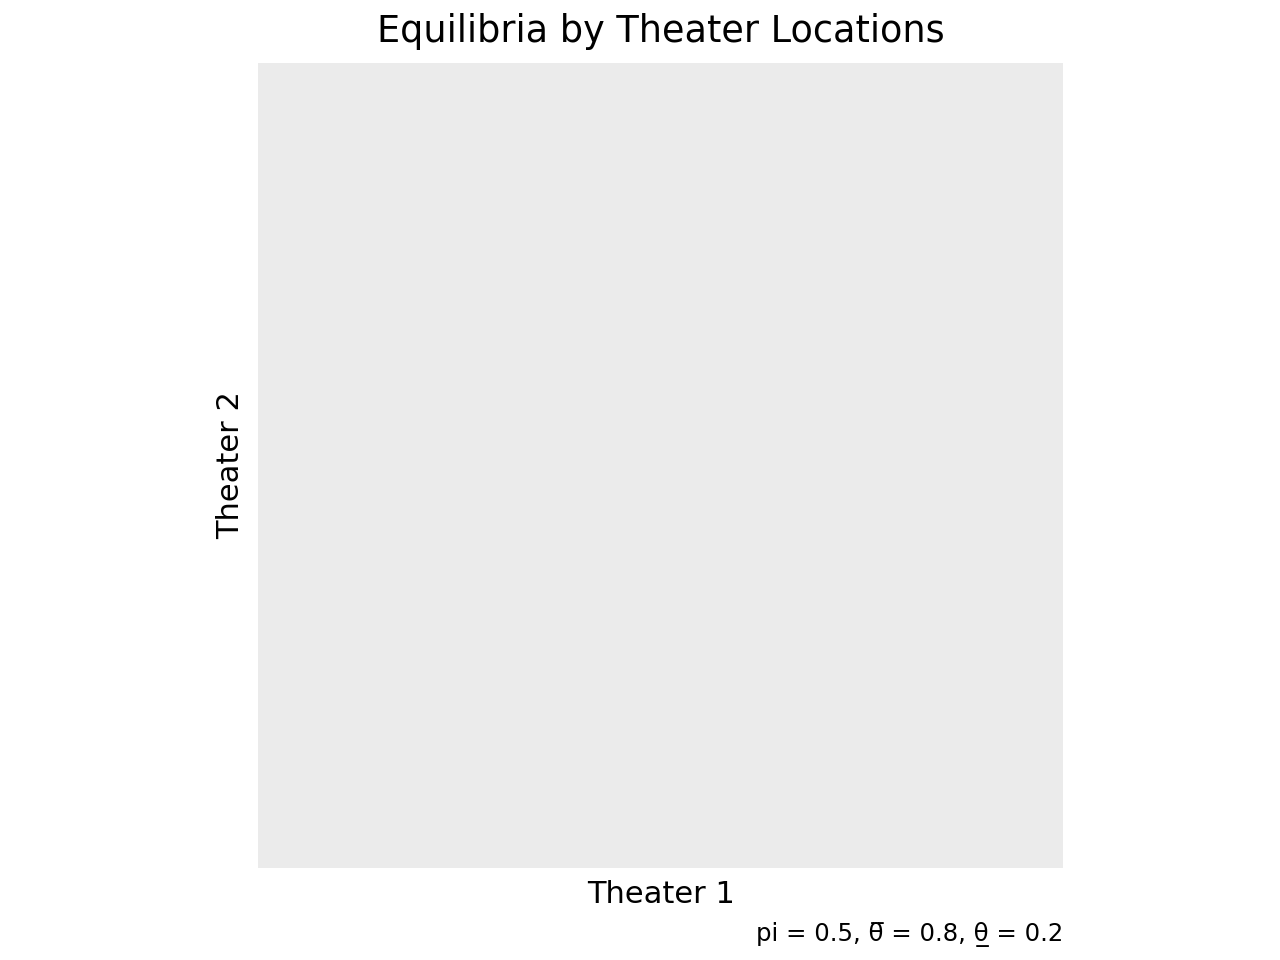

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.5)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt1 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.5, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt1.save("plot1")

plt1

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.45         0.75         0.25   1   1  0.55  0.225  0.640  0.225   
1    0.00  0.50         0.75         0.25   1   1  0.55  0.250  0.638  0.250   
2    0.00  0.55         0.75         0.25   1   1  0.55  0.264  0.624  0.261   
3    0.00  0.60         0.75         0.25   1   1  0.55  0.278  0.610  0.272   
4    0.05  0.40         0.75         0.25   1   1  0.55  0.225  0.618  0.225   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
273  0.25  0.90         0.75         0.25   1   1  0.55  0.541  0.391  0.534   
274  0.25  0.95         0.75         0.25   1   1  0.55  0.555  0.355  0.545   
275  0.25  1.00         0.75         0.25   1   1  0.55  0.569  0.319  0.556   
276  0.30  0.95         0.75         0.25   1   1  0.55  0.569  0.341  0.556   
277  0.30  1.00         0.75         0.25   1   1  0.55  0.582  0.305  0.568   

      u2dd   u1cd   u2cd   u1dc   u2dc 

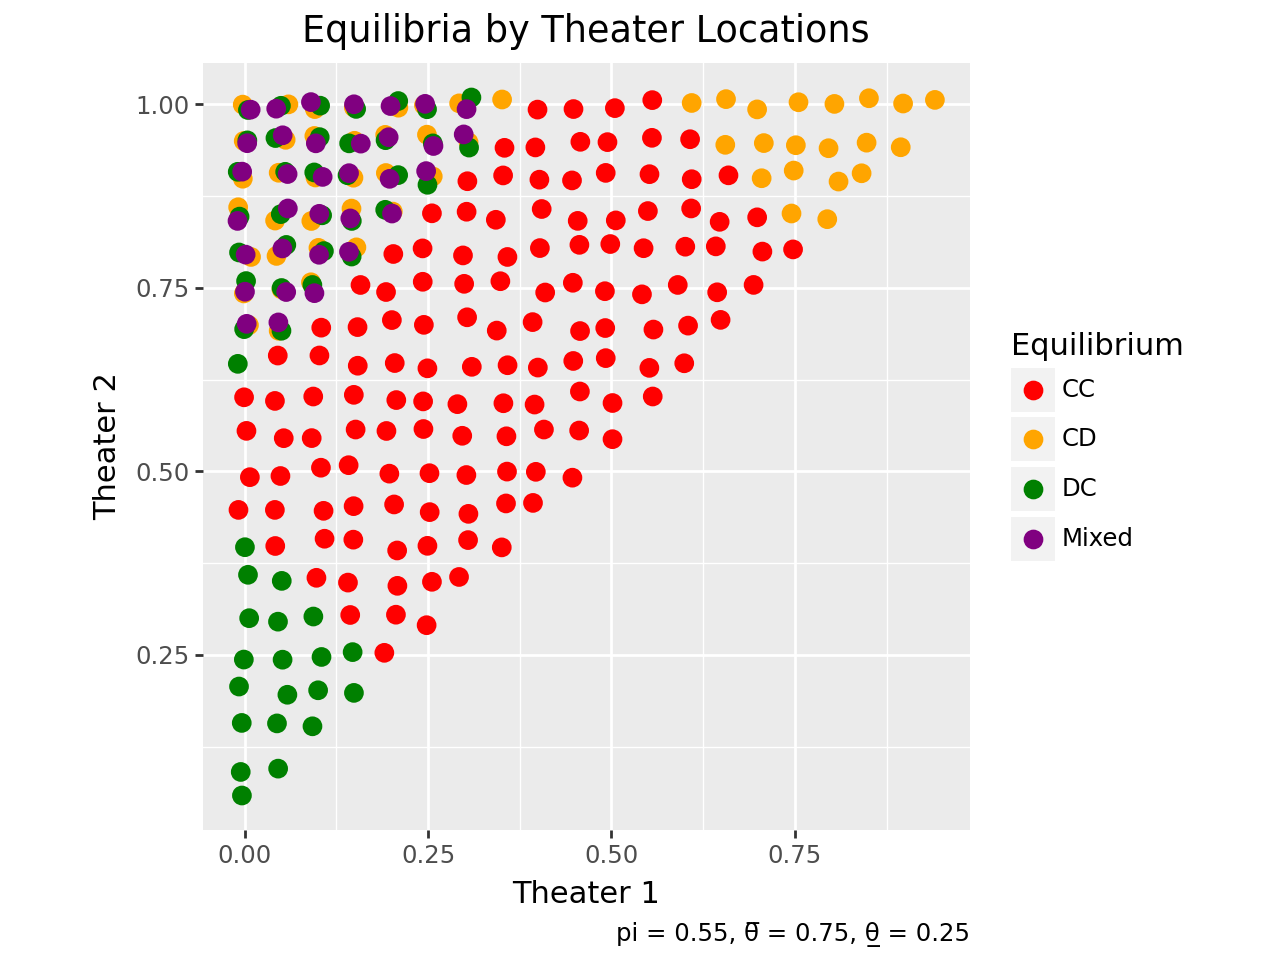

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.6)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt2 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.6, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt2.save("plot2")

plt2

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.05         0.75         0.25   1   1  0.45  0.025  0.500  0.025   
1    0.00  0.10         0.75         0.25   1   1  0.45  0.050  0.525  0.050   
2    0.00  0.15         0.75         0.25   1   1  0.45  0.075  0.550  0.075   
3    0.00  0.20         0.75         0.25   1   1  0.45  0.100  0.575  0.100   
4    0.00  0.25         0.75         0.25   1   1  0.45  0.125  0.600  0.125   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
273  0.25  0.90         0.75         0.25   1   1  0.45  0.534  0.384  0.541   
274  0.25  0.95         0.75         0.25   1   1  0.45  0.545  0.345  0.555   
275  0.25  1.00         0.75         0.25   1   1  0.45  0.556  0.306  0.569   
276  0.30  0.95         0.75         0.25   1   1  0.45  0.556  0.334  0.569   
277  0.30  1.00         0.75         0.25   1   1  0.45  0.568  0.295  0.582   

      u2dd   u1cd   u2cd   u1dc   u2dc 

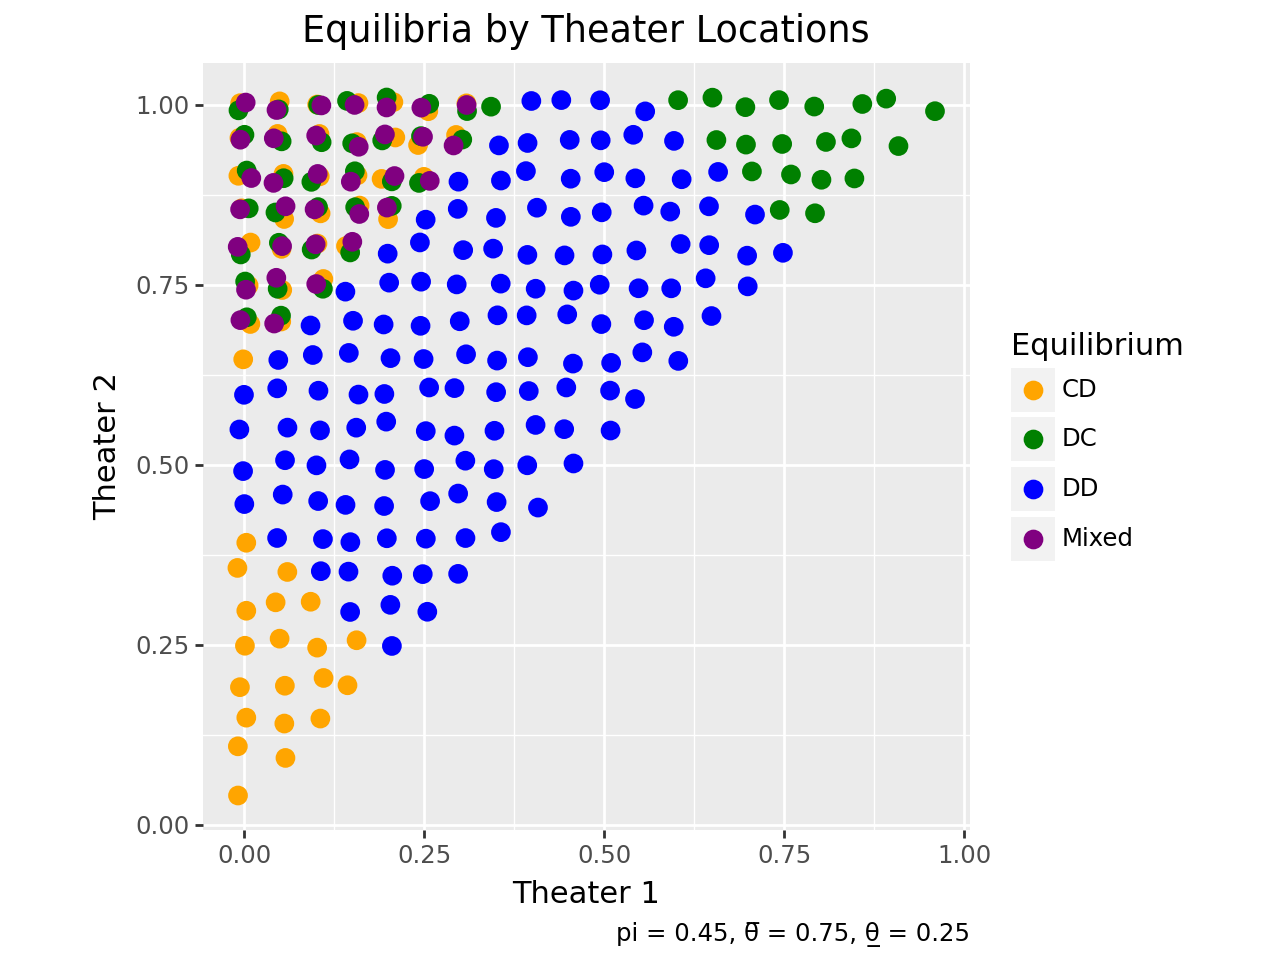

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.4)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt3 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.4, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt3.save("plot3")

plt3

       b1    b2  theta_upper  theta_lower  fc  fd   pi   u1cc   u2cc   u1dd  \
0    0.00  0.05         0.75         0.25   1   1  0.0  0.025  0.275  0.025   
1    0.00  0.10         0.75         0.25   1   1  0.0  0.050  0.300  0.050   
2    0.00  0.15         0.75         0.25   1   1  0.0  0.075  0.325  0.075   
3    0.00  0.20         0.75         0.25   1   1  0.0  0.100  0.350  0.100   
4    0.00  0.25         0.75         0.25   1   1  0.0  0.125  0.375  0.125   
..    ...   ...          ...          ...  ..  ..  ...    ...    ...    ...   
205  0.85  0.95         0.75         0.25   1   1  0.0  0.300  0.100  0.800   
206  0.85  1.00         0.75         0.25   1   1  0.0  0.325  0.075  0.825   
207  0.90  0.95         0.75         0.25   1   1  0.0  0.275  0.075  0.775   
208  0.90  1.00         0.75         0.25   1   1  0.0  0.300  0.050  0.800   
209  0.95  1.00         0.75         0.25   1   1  0.0  0.275  0.025  0.775   

      u2dd   u1cd   u2cd   u1dc   u2dc equilib  Tru

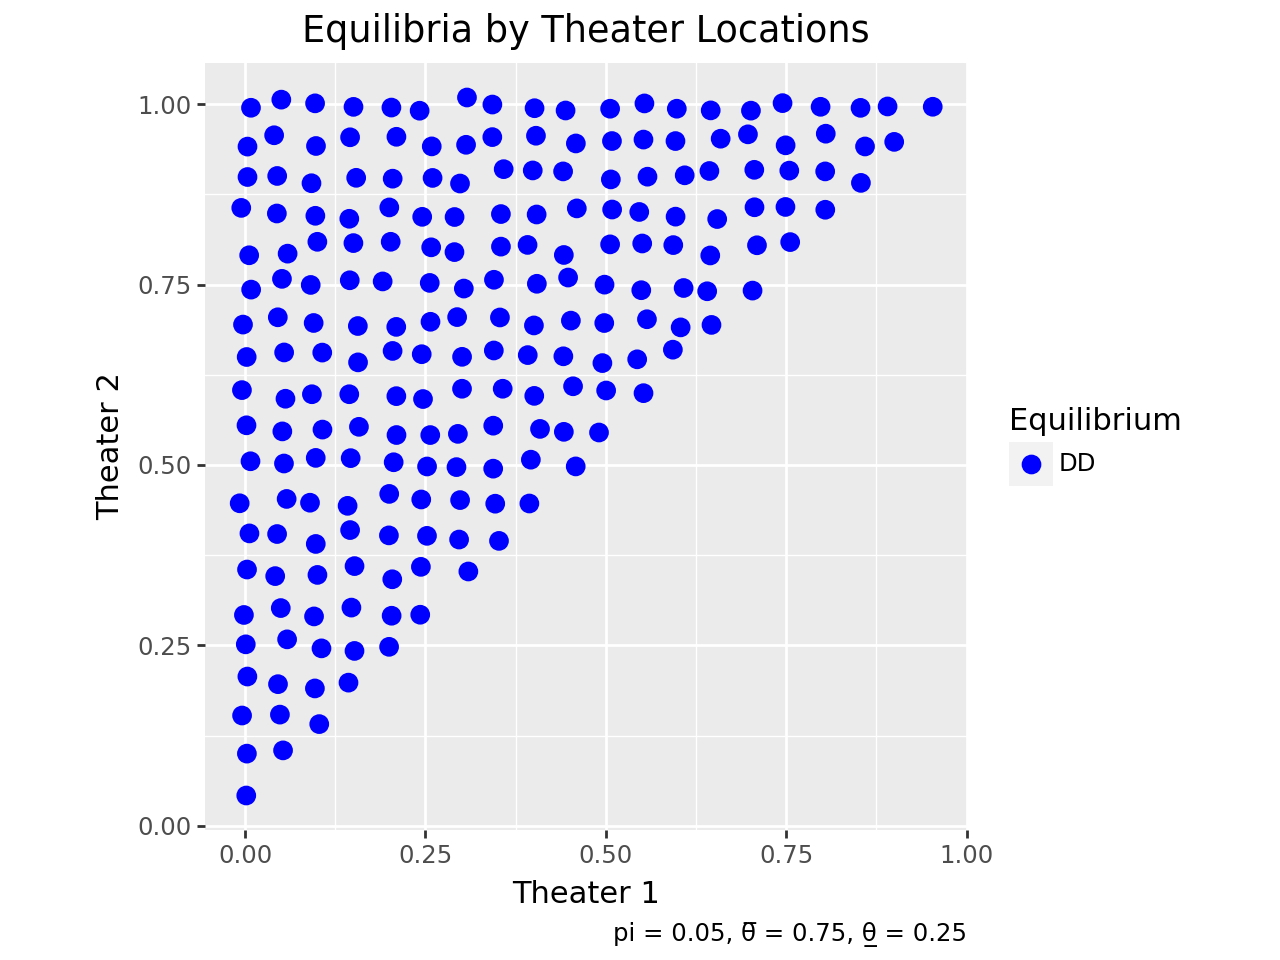

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt4 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt4.save("plot4")

plt4

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.05         0.75         0.25   1   1  0.35  0.025  0.450  0.025   
1    0.00  0.10         0.75         0.25   1   1  0.35  0.050  0.475  0.050   
2    0.00  0.15         0.75         0.25   1   1  0.35  0.075  0.500  0.075   
3    0.00  0.20         0.75         0.25   1   1  0.35  0.100  0.525  0.100   
4    0.00  0.25         0.75         0.25   1   1  0.35  0.125  0.550  0.125   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
211  0.80  0.85         0.75         0.25   1   1  0.35  0.450  0.175  0.600   
212  0.80  0.90         0.75         0.25   1   1  0.35  0.475  0.150  0.625   
213  0.00  0.95         0.75         0.25   1   1  0.35  0.329  0.379  0.396   
214  0.00  1.00         0.75         0.25   1   1  0.35  0.338  0.338  0.412   
215  0.05  1.00         0.75         0.25   1   1  0.35  0.379  0.329  0.446   

      u2dd   u1cd   u2cd   u1dc   u2dc 

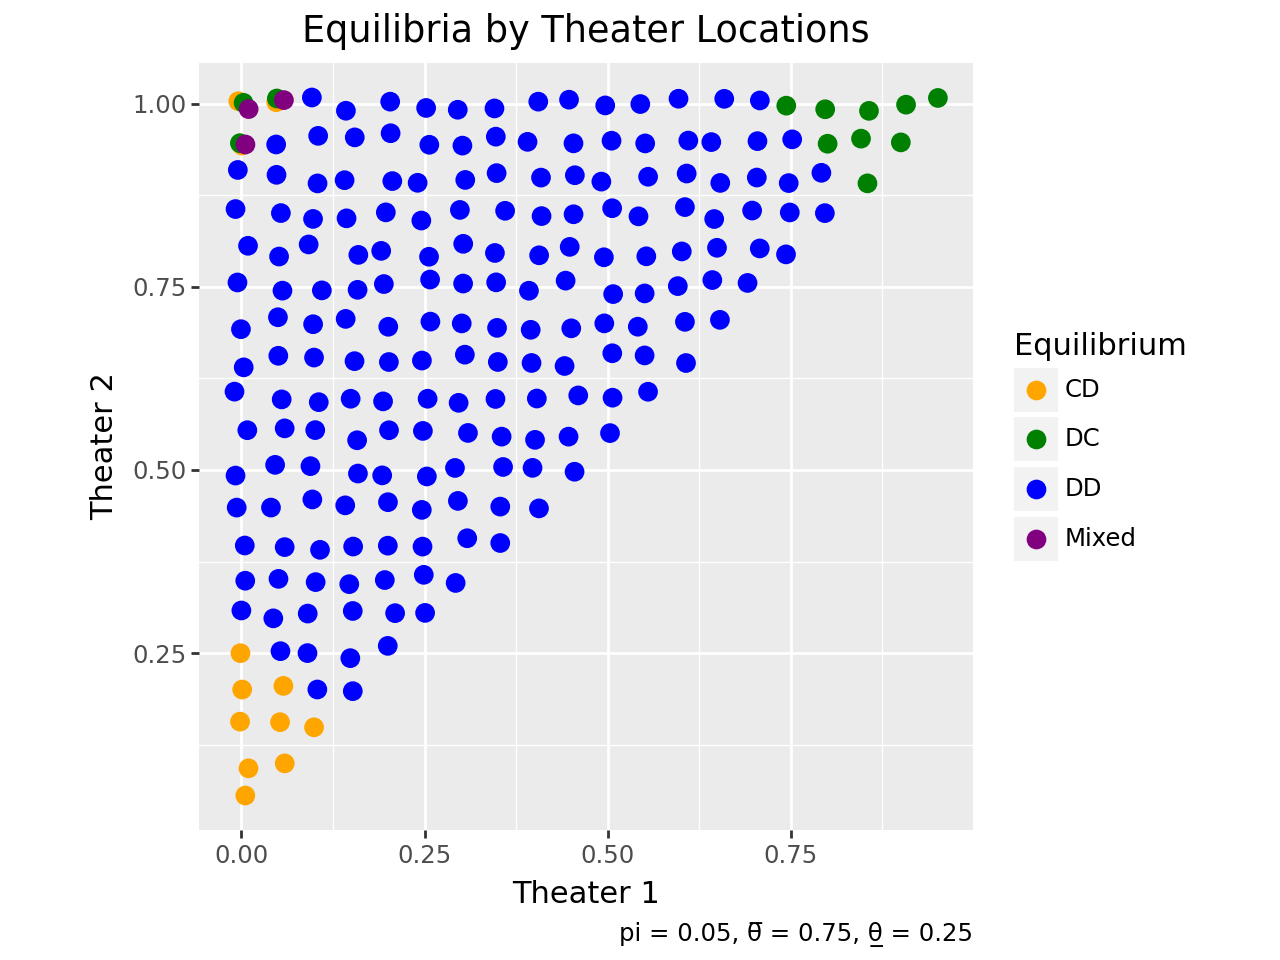

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.3)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt435 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.3, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt435.save("plot435")

plt435

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.05         0.75         0.25   1   1  0.25  0.025  0.400  0.025   
1    0.00  0.10         0.75         0.25   1   1  0.25  0.050  0.425  0.050   
2    0.00  0.15         0.75         0.25   1   1  0.25  0.075  0.450  0.075   
3    0.05  0.10         0.75         0.25   1   1  0.25  0.075  0.400  0.075   
4    0.85  1.00         0.75         0.25   1   1  0.25  0.450  0.075  0.700   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
205  0.80  0.90         0.75         0.25   1   1  0.25  0.425  0.150  0.675   
206  0.80  0.95         0.75         0.25   1   1  0.25  0.450  0.125  0.700   
207  0.80  1.00         0.75         0.25   1   1  0.25  0.475  0.100  0.725   
208  0.85  0.90         0.75         0.25   1   1  0.25  0.400  0.125  0.650   
209  0.85  0.95         0.75         0.25   1   1  0.25  0.425  0.100  0.675   

      u2dd   u1cd   u2cd   u1dc   u2dc 

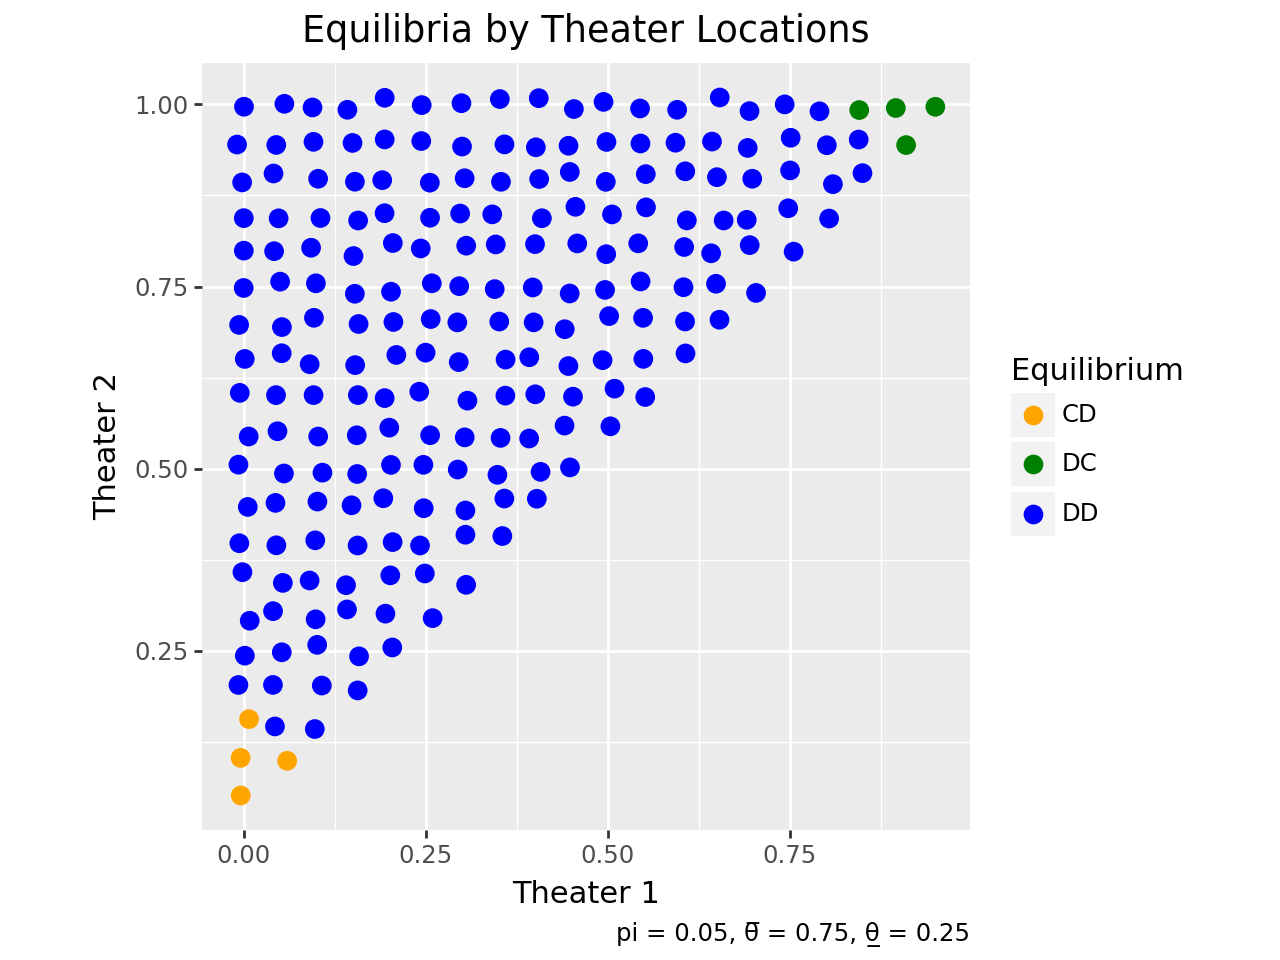

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.2)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt425 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.2, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt425.save("plot425")

plt425

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.05         0.75         0.25   1   1  0.15  0.025  0.350  0.025   
1    0.95  1.00         0.75         0.25   1   1  0.15  0.350  0.025  0.700   
2    0.00  0.10         0.75         0.25   1   1  0.15  0.050  0.375  0.050   
3    0.00  0.15         0.75         0.25   1   1  0.15  0.075  0.400  0.075   
4    0.00  0.20         0.75         0.25   1   1  0.15  0.100  0.425  0.100   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
205  0.85  0.90         0.75         0.25   1   1  0.15  0.350  0.125  0.700   
206  0.85  0.95         0.75         0.25   1   1  0.15  0.375  0.100  0.725   
207  0.85  1.00         0.75         0.25   1   1  0.15  0.400  0.075  0.750   
208  0.90  0.95         0.75         0.25   1   1  0.15  0.350  0.075  0.700   
209  0.90  1.00         0.75         0.25   1   1  0.15  0.375  0.050  0.725   

      u2dd   u1cd   u2cd   u1dc   u2dc 

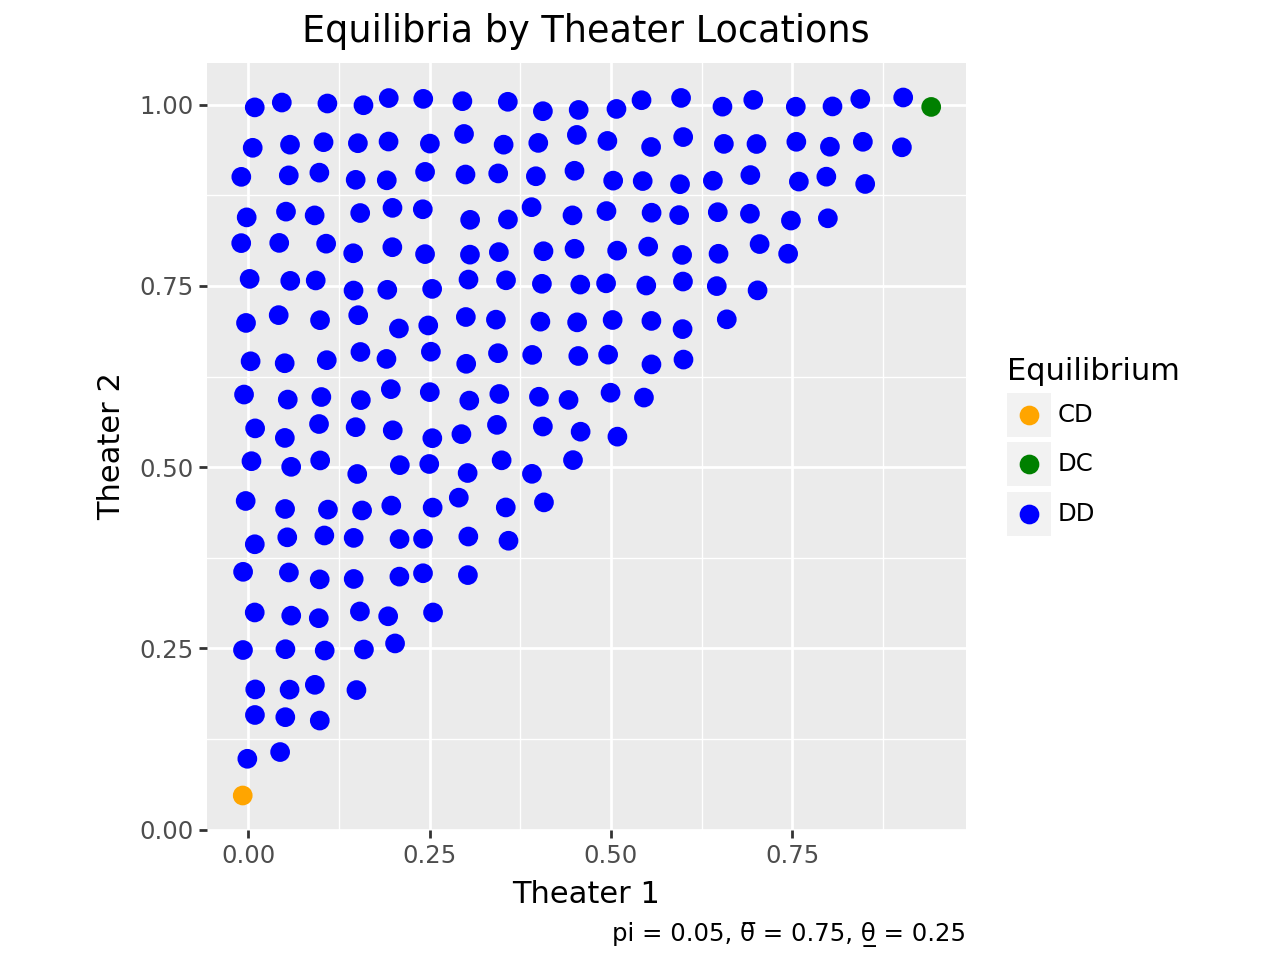

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.1)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt415 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.1, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt415.save("plot415")

plt415

       b1    b2  theta_upper  theta_lower  fc  fd   pi   u1cc   u2cc   u1dd  \
0    0.00  0.05         0.75         0.25   1   1  1.0  0.025  0.775  0.025   
1    0.00  0.10         0.75         0.25   1   1  1.0  0.050  0.800  0.050   
2    0.00  0.15         0.75         0.25   1   1  1.0  0.075  0.825  0.075   
3    0.00  0.20         0.75         0.25   1   1  1.0  0.100  0.850  0.100   
4    0.00  0.25         0.75         0.25   1   1  1.0  0.125  0.875  0.125   
..    ...   ...          ...          ...  ..  ..  ...    ...    ...    ...   
205  0.85  0.95         0.75         0.25   1   1  1.0  0.800  0.100  0.300   
206  0.85  1.00         0.75         0.25   1   1  1.0  0.825  0.075  0.325   
207  0.90  0.95         0.75         0.25   1   1  1.0  0.775  0.075  0.275   
208  0.90  1.00         0.75         0.25   1   1  1.0  0.800  0.050  0.300   
209  0.95  1.00         0.75         0.25   1   1  1.0  0.775  0.025  0.275   

      u2dd   u1cd   u2cd   u1dc   u2dc equilib  Tru

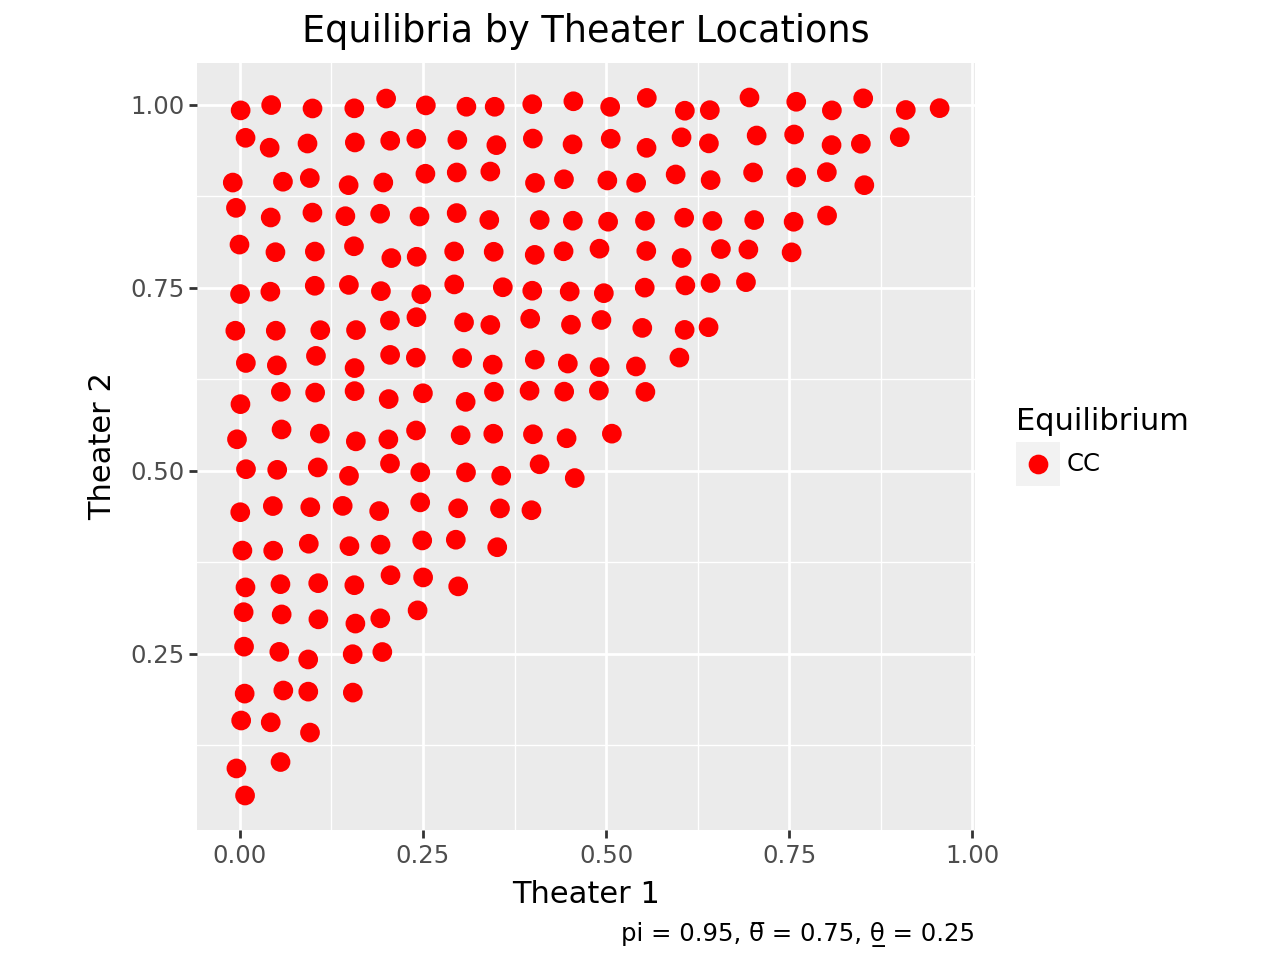

In [ ]:
from plotnine import *

df123 = df[(df['pi']==1)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt5 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 1, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt5.save("plot5")

plt5

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.30         0.75         0.25   1   1  0.65  0.150  0.692  0.150   
1    0.00  0.35         0.75         0.25   1   1  0.65  0.175  0.685  0.175   
2    0.00  0.40         0.75         0.25   1   1  0.65  0.200  0.678  0.200   
3    0.00  0.45         0.75         0.25   1   1  0.65  0.225  0.670  0.225   
4    0.00  0.50         0.75         0.25   1   1  0.65  0.250  0.662  0.250   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
211  0.05  1.00         0.75         0.25   1   1  0.65  0.446  0.396  0.379   
212  0.10  0.15         0.75         0.25   1   1  0.65  0.125  0.600  0.125   
213  0.00  0.95         0.75         0.25   1   1  0.65  0.396  0.446  0.329   
214  0.00  1.00         0.75         0.25   1   1  0.65  0.412  0.412  0.338   
215  0.05  1.00         0.75         0.25   1   1  0.65  0.446  0.396  0.379   

      u2dd   u1cd   u2cd   u1dc   u2dc 

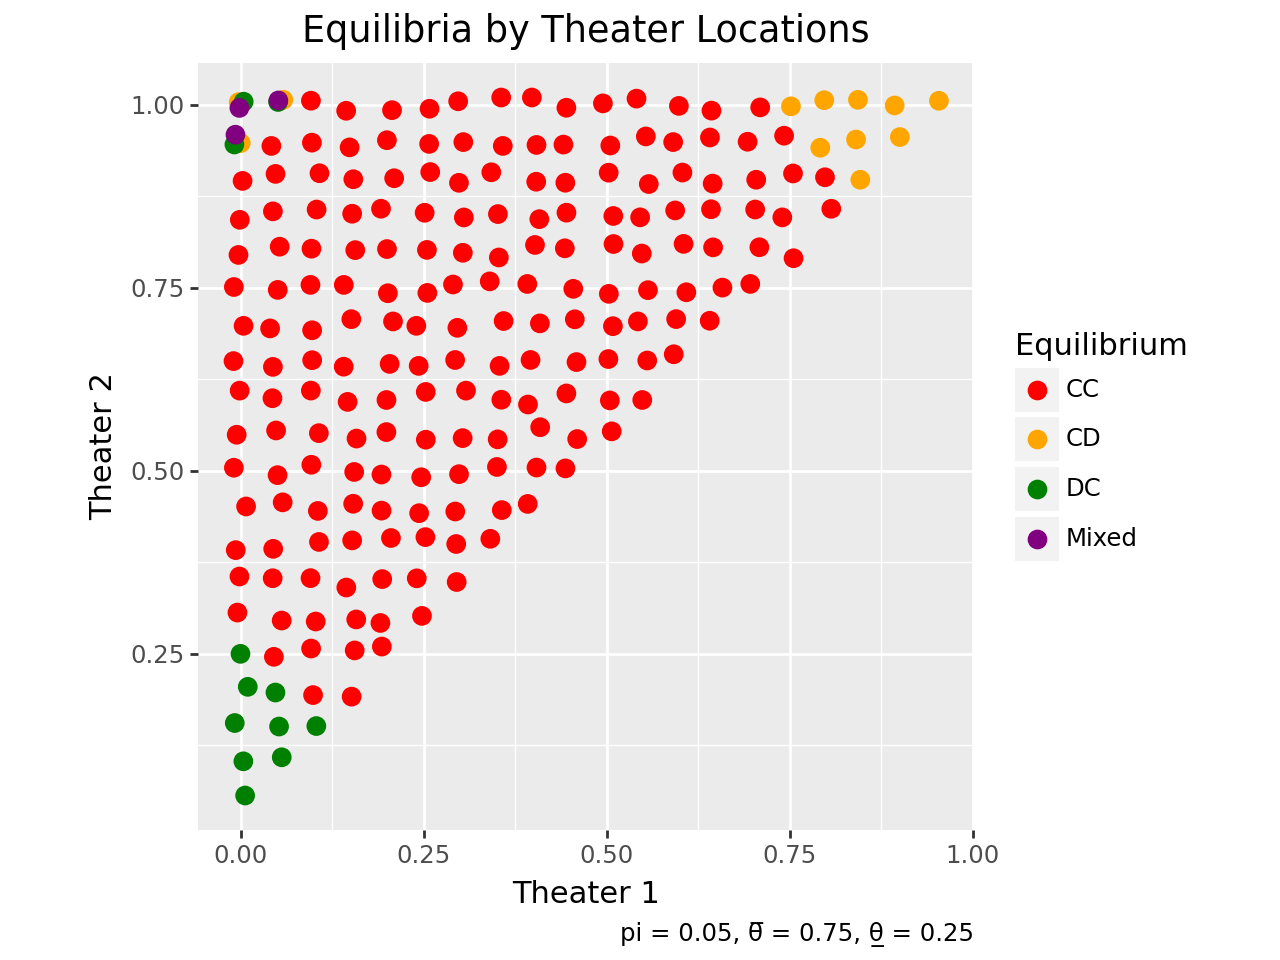

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.7)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt565 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.7, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt565.save("plot565")

plt565

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.20         0.75         0.25   1   1  0.75  0.100  0.725  0.100   
1    0.00  0.25         0.75         0.25   1   1  0.75  0.125  0.750  0.125   
2    0.00  0.30         0.75         0.25   1   1  0.75  0.150  0.738  0.150   
3    0.00  0.35         0.75         0.25   1   1  0.75  0.175  0.725  0.175   
4    0.00  0.40         0.75         0.25   1   1  0.75  0.200  0.712  0.200   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
205  0.95  1.00         0.75         0.25   1   1  0.75  0.650  0.025  0.400   
206  0.00  0.05         0.75         0.25   1   1  0.75  0.025  0.650  0.025   
207  0.00  0.10         0.75         0.25   1   1  0.75  0.050  0.675  0.050   
208  0.00  0.15         0.75         0.25   1   1  0.75  0.075  0.700  0.075   
209  0.05  0.10         0.75         0.25   1   1  0.75  0.075  0.650  0.075   

      u2dd   u1cd   u2cd   u1dc   u2dc 

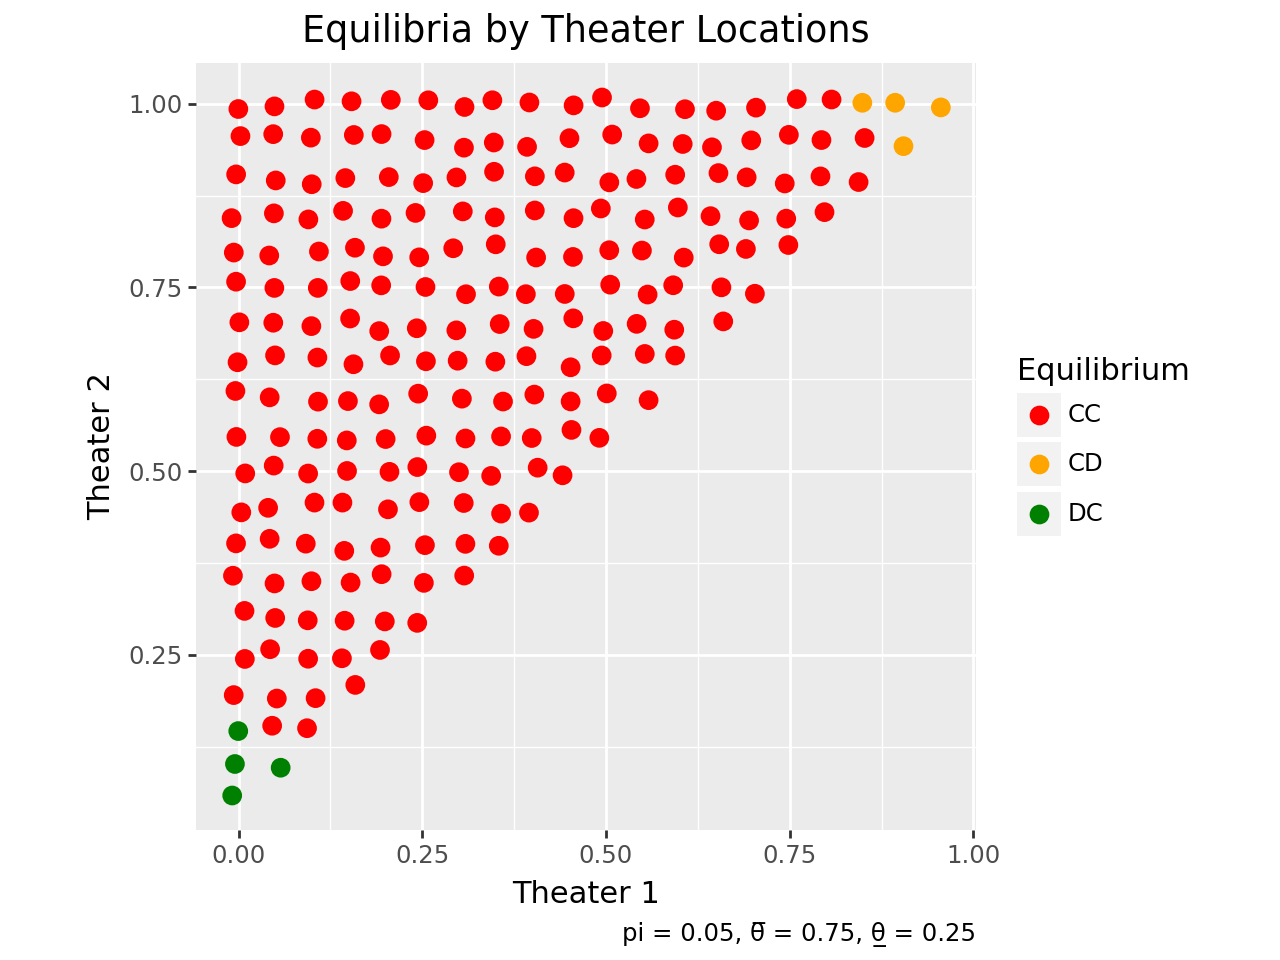

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.8)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt575 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.05, \u03b8\u0305 = 0.75, \u03b8\u0332 = 0.25", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt575.save("plot575")

plt575

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.10         0.75         0.25   1   1  0.85  0.050  0.725  0.050   
1    0.00  0.15         0.75         0.25   1   1  0.85  0.075  0.750  0.075   
2    0.00  0.20         0.75         0.25   1   1  0.85  0.100  0.775  0.100   
3    0.00  0.25         0.75         0.25   1   1  0.85  0.125  0.800  0.125   
4    0.00  0.30         0.75         0.25   1   1  0.85  0.150  0.782  0.150   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
205  0.85  1.00         0.75         0.25   1   1  0.85  0.750  0.075  0.400   
206  0.90  0.95         0.75         0.25   1   1  0.85  0.700  0.075  0.350   
207  0.90  1.00         0.75         0.25   1   1  0.85  0.725  0.050  0.375   
208  0.95  1.00         0.75         0.25   1   1  0.85  0.700  0.025  0.350   
209  0.00  0.05         0.75         0.25   1   1  0.85  0.025  0.700  0.025   

      u2dd   u1cd   u2cd   u1dc   u2dc 

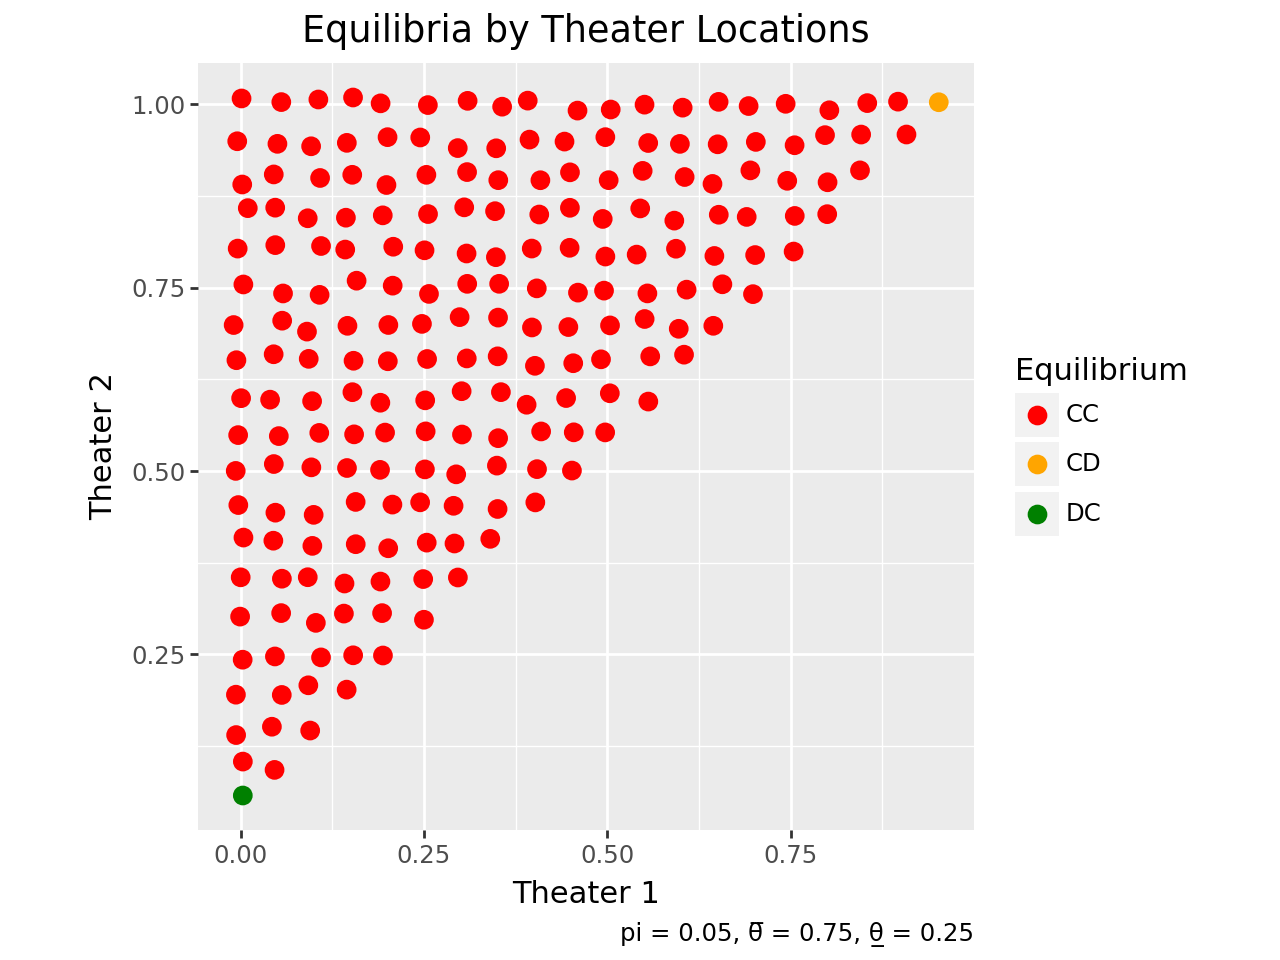

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.9)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt585 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.9, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt585.save("plot585")

plt585

       b1    b2  theta_upper  theta_lower  fc  fd   pi   u1cc   u2cc   u1dd  \
0    0.00  0.20          0.6          0.4   1   1  0.5  0.100  0.600  0.100   
1    0.00  0.25          0.6          0.4   1   1  0.5  0.125  0.625  0.125   
2    0.00  0.30          0.6          0.4   1   1  0.5  0.150  0.650  0.150   
3    0.00  0.35          0.6          0.4   1   1  0.5  0.175  0.675  0.175   
4    0.00  0.40          0.6          0.4   1   1  0.5  0.200  0.700  0.200   
..    ...   ...          ...          ...  ..  ..  ...    ...    ...    ...   
809  0.05  0.95          0.6          0.4   1   1  0.5  0.475  0.475  0.475   
810  0.05  1.00          0.6          0.4   1   1  0.5  0.488  0.438  0.488   
811  0.10  0.95          0.6          0.4   1   1  0.5  0.512  0.462  0.512   
812  0.10  1.00          0.6          0.4   1   1  0.5  0.525  0.425  0.525   
813  0.15  1.00          0.6          0.4   1   1  0.5  0.562  0.412  0.562   

      u2dd   u1cd   u2cd   u1dc   u2dc equilib  Tru

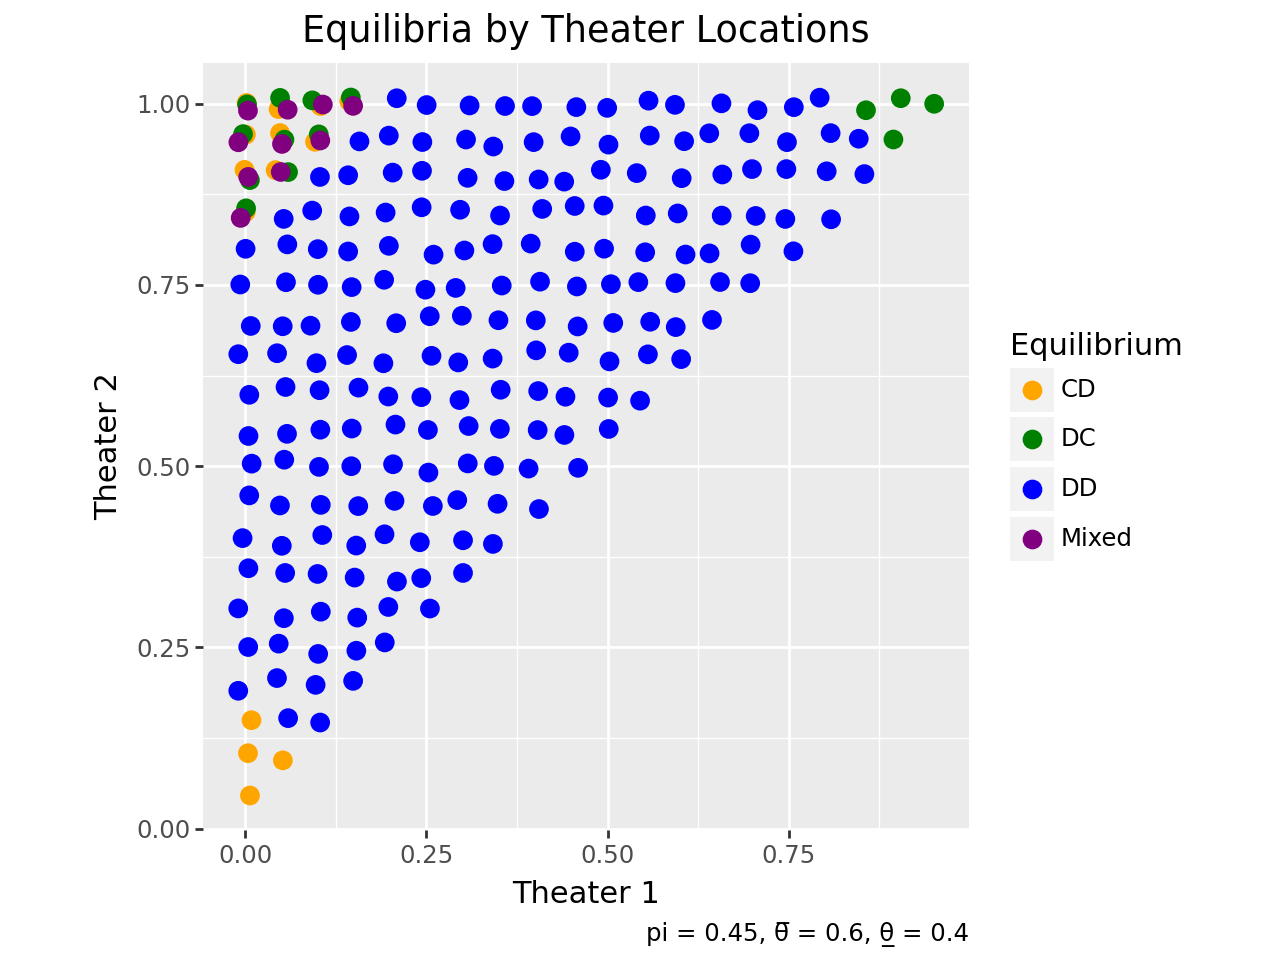

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.5)&(df['theta_upper']==0.6)&(df['theta_lower']==0.4)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt6 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.5, \u03b8\u0305 = 0.6, \u03b8\u0332 = 0.4", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt6.save("plot6")

plt6

from plotnine import *

df123 = df[(df['pi']==0.6)&(df['theta_upper']==0.6)&(df['theta_lower']==0.4)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt7 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.6, \u03b8\u0305 = 0.6, \u03b8\u0332 = 0.4", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt7.save("plot7")

plt7

df123 = df[(df['pi']==0.4)&(df['theta_upper']==0.6)&(df['theta_lower']==0.4)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt8 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.4, \u03b8\u0305 = 0.6, \u03b8\u0332 = 0.4", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt8.save("plot8")

plt8

       b1    b2  theta_upper  theta_lower  fc  fd   pi   u1cc   u2cc   u1dd  \
0    0.00  0.05          0.9          0.1   1   1  0.5  0.025  0.525  0.025   
1    0.00  0.10          0.9          0.1   1   1  0.5  0.050  0.550  0.050   
2    0.00  0.15          0.9          0.1   1   1  0.5  0.075  0.550  0.075   
3    0.00  0.20          0.9          0.1   1   1  0.5  0.100  0.550  0.100   
4    0.00  0.25          0.9          0.1   1   1  0.5  0.112  0.538  0.112   
..    ...   ...          ...          ...  ..  ..  ...    ...    ...    ...   
625  0.85  0.95          0.9          0.1   1   1  0.5  0.525  0.100  0.525   
626  0.85  1.00          0.9          0.1   1   1  0.5  0.550  0.075  0.550   
627  0.90  0.95          0.9          0.1   1   1  0.5  0.525  0.075  0.525   
628  0.90  1.00          0.9          0.1   1   1  0.5  0.550  0.050  0.550   
629  0.95  1.00          0.9          0.1   1   1  0.5  0.525  0.025  0.525   

      u2dd   u1cd   u2cd   u1dc   u2dc equilib  Tru

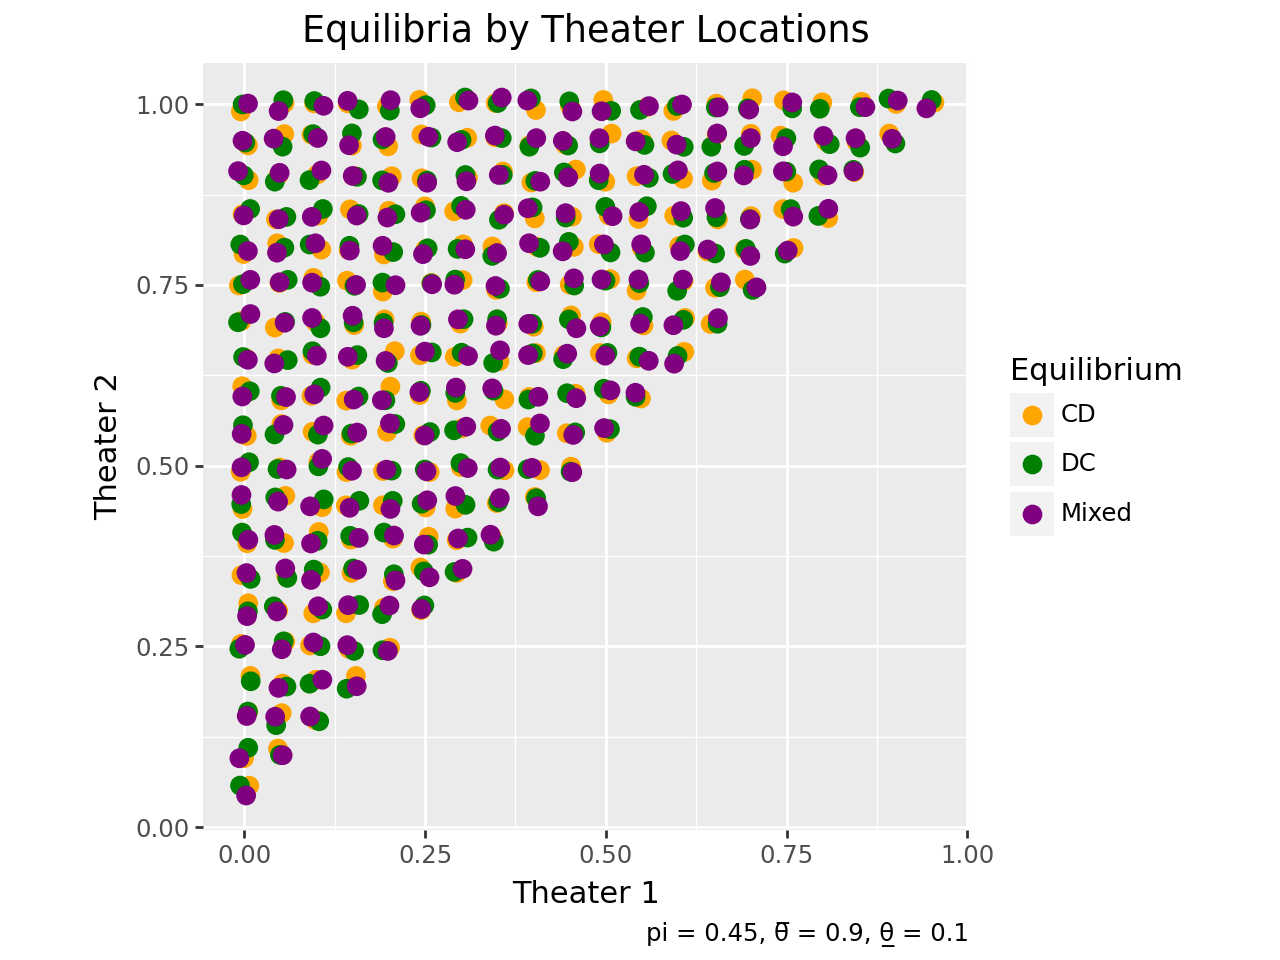

In [ ]:
from plotnine import *

df123 = df[(df['pi']==0.5)&(df['theta_upper']==0.9)&(df['theta_lower']==0.1)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt9 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.5, \u03b8\u0305 = 0.9, \u03b8\u0332 = 0.1", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt9.save("plot9")

plt9

from plotnine import *

df123 = df[(df['pi']==0.6)&(df['theta_upper']==0.9)&(df['theta_lower']==0.1)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt10 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.6, \u03b8\u0305 = 0.9, \u03b8\u0332 = 0.1", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt10.save("plot10")

plt10

df123 = df[(df['pi']==0.4)&(df['theta_upper']==0.9)&(df['theta_lower']==0.1)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt11 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.4, \u03b8\u0305 = 0.9, \u03b8\u0332 = 0.1", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt11.save("plot11")

plt11

In [ ]:
# find indifference condition for each line (so between CC and CD, find function of b1 & b2)